**Assignment-1**

**Names-Hariharan Gopinath, Amogha Udayakumar**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/DAT405/life-expectancy-vs-gdp-per-capita.csv")

Mounted at /content/drive


In [ ]:
df

In [ ]:
df_year=df[df['Year'] == 2015]
df_new=df_year[['Entity','Year','Life expectancy','GDP per capita','Continent','Total population (Gapminder, HYDE & UN)']]


df_europe = df_new.loc[df['Continent'].isin(['Europe'])].dropna()
df_Asia = df_new.loc[df['Continent'].isin(['Asia'])].dropna()
df_Africa = df_new.loc[df['Continent'].isin(['Africa'])].dropna()
df_SA = df_new.loc[df['Continent'].isin(['South America'])].dropna()
df_NA = df_new.loc[df['Continent'].isin(['North America'])].dropna()

print("Europe\n")
print(df_europe.count())
print("Asia\n")
print(df_Asia.count())
print("Africa\n")
print(df_Africa.count())
print("South America\n")
print(df_SA.count())
print("North America\n")
print(df_NA.count())

In [ ]:
df_Asia

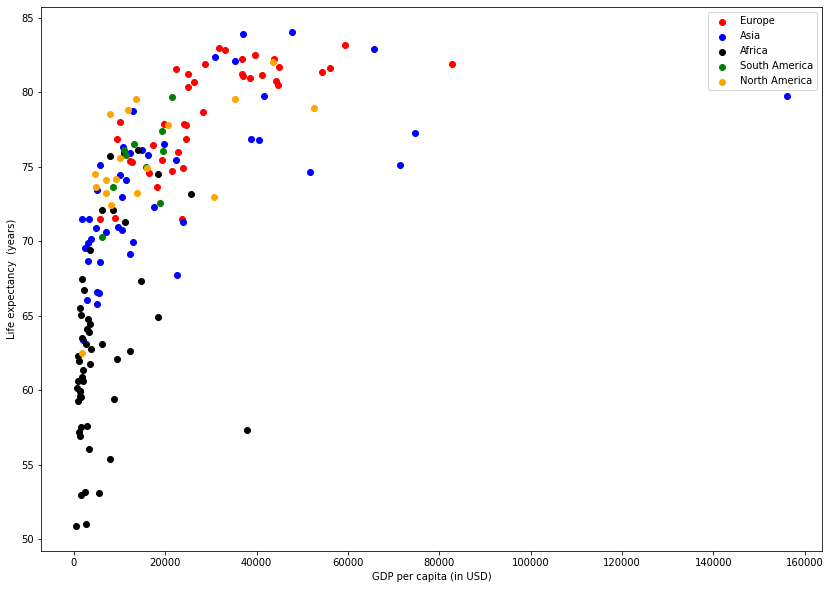

()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(14,10))



ax.scatter(df_europe['GDP per capita'],df_europe['Life expectancy'], c='red', label='Europe')
ax.scatter(df_Asia['GDP per capita'],df_Asia['Life expectancy'], c='Blue', label='Asia')
ax.scatter(df_Africa['GDP per capita'],df_Africa['Life expectancy'], c='black', label='Africa')
ax.scatter(df_SA['GDP per capita'],df_SA['Life expectancy'], c='green', label='South America')
ax.scatter(df_NA['GDP per capita'],df_NA['Life expectancy'], c='orange', label='North America')



#ax.scatter(df_europe['GDP per capita'],df_europe['Life expectancy'], c='red', label='Europe',alpha=0.3, edgecolors='none')
#plt.plot(df_europe['GDP per capita'].mean(),df_europe['Life expectancy'].mean())
#years_filter_new

ax.legend()
plt.xlabel('GDP per capita (in USD)')
plt.ylabel('Life expectancy  (years)')
plt.show()
()


**Question D**

Which countries have a life expectancy higher than one standard deviation
above the mean?

In [ ]:
df_C = df_new.loc[df['Continent'].isin(['Europe','Asia','Africa','South America','North America'])]


df_NA_new=df_C[['Entity','Life expectancy','Year']]

df_NA_new=df_NA_new.dropna()

df_NA_new_mean=df_NA_new['Life expectancy'].mean()

df_NA_new_std=df_NA_new['Life expectancy'].std()

mean_onestd = df_NA_new[(df_NA_new['Life expectancy'] > (df_NA_new_mean + df_NA_new_std))]
mean_onestd=mean_onestd[['Entity','Life expectancy']].set_index('Entity')
mean_onestd

,Life expectancy
Entity,
Andorra,83.073
Anguilla,81.332
Austria,81.182
Belgium,80.969
Bermuda,81.999
Canada,82.026
Cayman Islands,83.324
Channel Islands,82.429
Falkland Islands,80.876


**e. Which countries have high life expectancy but have low GDP?**

In [ ]:
df_e=df_year[['Entity','Life expectancy','GDP per capita','Continent','Total population (Gapminder, HYDE & UN)']]
df_e=df_e.dropna()


In [ ]:
df_Continent_GDP = df_e.loc[df['Continent'].isin(['Europe','Asia','Africa','South America','North America'])]
df_Continent_GDP['Continent_GDP(Billion)']= (df_Continent_GDP['GDP per capita'] * df_Continent_GDP['Total population (Gapminder, HYDE & UN)'])/1000000000



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_Continent_GDP

,Entity,Life expectancy,GDP per capita,Continent,"Total population (Gapminder, HYDE & UN)",Continent_GDP(Billion)
66,Afghanistan,63.377,1928.0,Asia,34414000.0,66.350192
410,Albania,78.025,10032.0,Europe,2891000.0,29.002512
633,Algeria,76.090,14004.0,Africa,39728000.0,556.350912
1217,Angola,59.398,8689.0,Africa,27884000.0,242.284076
1742,Argentina,76.068,19502.0,South America,43075000.0,840.048650
...,...,...,...,...,...,...
50074,Venezuela,72.584,18802.0,South America,30082000.0,565.601764
50289,Vietnam,75.110,5763.0,Asia,92677000.0,534.097551
50849,Yemen,66.085,2844.0,Asia,26498000.0,75.360312
51072,Zambia,61.737,3478.0,Africa,15879000.0,55.227162


In [ ]:
# mean + 1 SD
df_High_LE_Low_GDP=df_Continent_GDP[(df_Continent_GDP['Life expectancy'] > (df_Continent_GDP['Life expectancy'].mean()+df_Continent_GDP['Life expectancy'].std()))&(df_Continent_GDP['Continent_GDP(Billion)']<(df_Continent_GDP['Continent_GDP(Billion)'].mean()-df_Continent_GDP['Continent_GDP(Billion)'].std()))]
df_High_LE_Low_GDP[['Entity','Life expectancy','Continent_GDP(Billion)']].set_index('Entity').sort_values('Continent_GDP(Billion)')


,Life expectancy,Continent_GDP(Billion)
Entity,,


In [ ]:
df_Continent_GDP['Life expectancy'].mean()+df_Continent_GDP['Life expectancy'].std()

79.85177608125015

**F. Does every strong economy (normally indicated by GDP) have high life
expectancy?**

In [ ]:
# mean + 1 SD

strong_economy=df_Continent_GDP[(df_Continent_GDP['Continent_GDP(Billion)']>(df_Continent_GDP['Continent_GDP(Billion)'].mean()+df_Continent_GDP['Continent_GDP(Billion)'].std()))]
sorted_values=strong_economy.sort_values('Continent_GDP(Billion)').set_index('Entity')
sorted_values[['Life expectancy','Continent_GDP(Billion)']].sort_values(['Continent_GDP(Billion)'])

,Life expectancy,Continent_GDP(Billion)
Entity,,
Indonesia,70.768,2708.887456
Brazil,74.994,3235.973872
Russia,71.464,3434.839445
Germany,80.770,3622.591591
Japan,83.879,4739.412535
India,68.607,7591.020317
United States,78.910,16875.295739
China,75.928,17225.446912


In [ ]:
(df_Continent_GDP['Continent_GDP(Billion)'].mean()+df_Continent_GDP['Continent_GDP(Billion)'].std())

2691.9126285705397

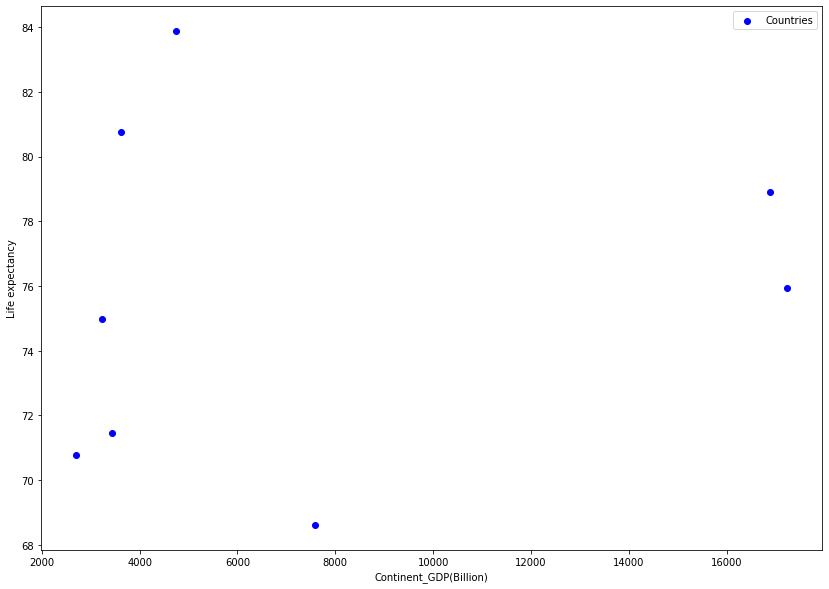

In [ ]:
fig,ax=plt.subplots(figsize=(14,10))




ax.scatter(strong_economy['Continent_GDP(Billion)'],strong_economy['Life expectancy'], c='blue', label='Countries')



#ax.scatter(df_europe['GDP per capita'],df_europe['Life expectancy'], c='red', label='Europe',alpha=0.3, edgecolors='none')
#plt.plot(df_europe['GDP per capita'].mean(),df_europe['Life expectancy'].mean())
#years_filter_new

ax.legend()
plt.xlabel('Continent_GDP(Billion)')
plt.ylabel('Life expectancy')
plt.show()


**G.Related to question f, what would happen if you use GDP per capita as an
indicator of strong economy? Explain the results you obtained, and discuss
any insights you get from comparing the results of g and f.**

In [ ]:
# mean + 1 SD

strong_economy_per_capita=df_Continent_GDP[(df_Continent_GDP['GDP per capita']>(df_Continent_GDP['GDP per capita'].mean()+df_Continent_GDP['GDP per capita'].std()))]
sorted_value=strong_economy_per_capita.sort_values('GDP per capita').set_index('Entity')
sorted_value[['Life expectancy','GDP per capita','Total population (Gapminder, HYDE & UN)','Continent_GDP(Billion)']].sort_values('GDP per capita')


,Life expectancy,GDP per capita,"Total population (Gapminder, HYDE & UN)",Continent_GDP(Billion)
Entity,,,,
Belgium,80.969,38569.0,11288000.0,435.366872
Oman,76.887,38738.0,4267000.0,165.295046
Iceland,82.481,39727.0,330000.0,13.109910
Bahrain,76.762,40483.0,1372000.0,55.542676
Austria,81.182,41294.0,8679000.0,358.390626
Taiwan,79.743,41668.0,23557000.0,981.573076
Canada,82.026,43619.0,36027000.0,1571.461713
Sweden,82.251,43746.0,9765000.0,427.179690
Germany,80.770,44293.0,81787000.0,3622.591591


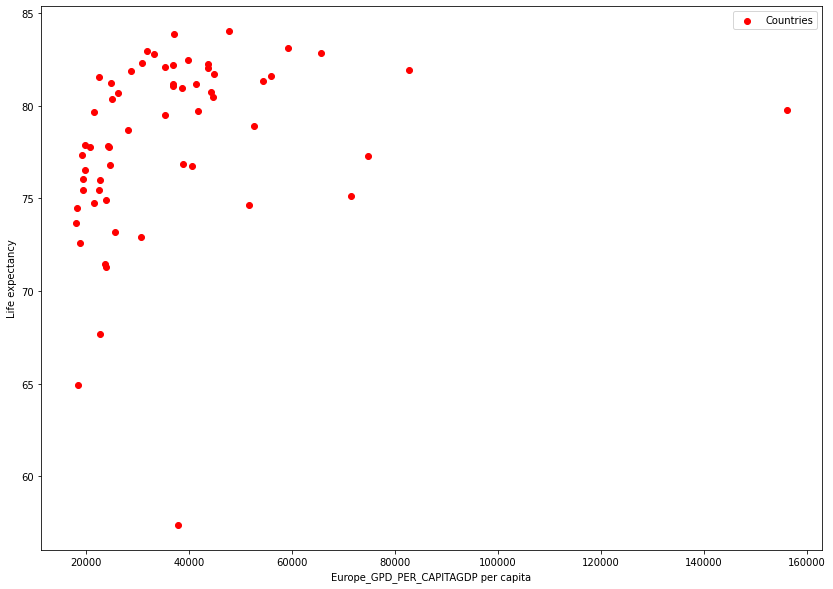

In [ ]:
Strong_GDP_per_capita=df_Continent_GDP[(df_Continent_GDP['GDP per capita']>df_Continent_GDP['GDP per capita'].mean())]
Strong_GDP_per_capita

fig,ax=plt.subplots(figsize=(14,10))


ax.scatter(Strong_GDP_per_capita['GDP per capita'],Strong_GDP_per_capita['Life expectancy'], c='red', label='Countries')

#ax.scatter(df_europe['GDP per capita'],df_europe['Life expectancy'], c='red', label='Europe',alpha=0.3, edgecolors='none')
#plt.plot(df_europe['GDP per capita'].mean(),df_europe['Life expectancy'].mean())
#years_filter_new

ax.legend()
plt.xlabel('Europe_GPD_PER_CAPITAGDP per capita')
plt.ylabel('Life expectancy')
plt.show()


In [ ]:
df_year=df[df['Year'] == 2015]
df_new=df_year[['Entity','Year','Life expectancy','GDP per capita','Continent']]


df_qatar = df_new.loc[df['Entity'].isin(['Qatar'])]
df_qatar

,Entity,Year,Life expectancy,GDP per capita,Continent
36959,Qatar,2015,79.758,156029.0,Asia


**Problem 2**


In [ ]:
df_GDP = pd.read_csv("/content/drive/MyDrive/DAT405/life-expectancy-vs-gdp-per-capita.csv")
df_eco = pd.read_csv("/content/drive/MyDrive/DAT405/economic-freedom.csv")
df_happy=pd.read_csv("/content/drive/MyDrive/DAT405/Happiness_VS_Life_Satisfaction.csv")
df_hour=pd.read_csv("/content/drive/MyDrive/DAT405/annual-working-hour.csv")



In [ ]:
df

,Entity,Code,Year,Life expectancy,GDP per capita,145446-annotations,"Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1950,27.638,1156.0,NaN,7752000.0,NaN
2,Afghanistan,AFG,1951,27.878,1170.0,NaN,7840000.0,NaN
3,Afghanistan,AFG,1952,28.361,1189.0,NaN,7936000.0,NaN
4,Afghanistan,AFG,1953,28.852,1240.0,NaN,8040000.0,NaN
...,...,...,...,...,...,...,...,...
51444,Zimbabwe,ZWE,1946,NaN,NaN,NaN,2648973.0,NaN
51445,Zimbabwe,ZWE,1947,NaN,NaN,NaN,2667953.0,NaN
51446,Zimbabwe,ZWE,1948,NaN,NaN,NaN,2687069.0,NaN
51447,Zimbabwe,ZWE,1949,NaN,NaN,NaN,2706321.0,NaN


**Top 3 populated developing countries**

In [ ]:
#hours
df_hours_developing_countries = df_hour[df_hour['Entity'].isin(['China','India','Indonesia'])]
#df_hours_developing_countries_year=df_hours_developing_countries.loc[df_hours_developing_countries['Year'].isin(['2013','2014','2015','2016','2017'])]
df_hours_developing_countries_year=df_hours_developing_countries.loc[df_hours_developing_countries['Year'].isin(['2015'])]



China

In [ ]:

#hours
df_hours_china = df_hour[df_hour['Entity'].isin(['China'])]
df_hours_china_year=df_hours_china.loc[df_hours_china['Year'].isin(['2013','2014','2015','2016','2017'])]

#GDP 
df_GDP_china = df_GDP[df_GDP['Entity'].isin(['China'])]
df_GDP_china_year=df_GDP_china.loc[df_GDP_china['Year'].isin(['2013','2014','2015','2016','2017'])]


#happiness
df_happy_china = df_happy[df_happy['Entity'].isin(['China'])]
df_happy_china_year=df_happy_china.loc[df_happy_china['Year'].isin(['2012','2013','2014','2015','2016'])]

#life expectancy
df_expectancy_china=df_GDP[df_GDP['Entity'].isin(['China'])]
df_expectancy_china_year=df_expectancy_china.loc[df_expectancy_china['Year'].isin(['2013','2014','2015','2016','2017'])]


#economic_freedom
df_eco_china = df_eco[df_eco['Entity'].isin(['China'])]
df_eco_china_year=df_eco_china.loc[df_eco_china['Year'].isin(['2012','2013','2014','2015','2016'])]



"""
#hours
df_hours_china = df_hour[df_hour['Entity'].isin(['China'])]
df_hours_china_year=df_hours_china.loc[df_hours_china['Year'].isin(['2015'])]

#GDP 
df_GDP_china = df_GDP[df_GDP['Entity'].isin(['China'])]
df_GDP_china_year=df_GDP_china.loc[df_GDP_china['Year'].isin(['2015'])]


#happiness
df_happy_china = df_happy[df_happy['Entity'].isin(['China'])]
df_happy_china_year=df_happy_china.loc[df_happy_china['Year'].isin(['2015'])]

#life expectancy
df_expectancy_china=df_GDP[df_GDP['Entity'].isin(['China'])]
df_expectancy_china_year=df_expectancy_china.loc[df_expectancy_china['Year'].isin(['2015'])]


#economic_freedom
df_eco_china = df_eco[df_eco['Entity'].isin(['China'])]
df_eco_china_year=df_eco_china.loc[df_eco_china['Year'].isin(['2015'])]
"""

"\n#hours\ndf_hours_china = df_hour[df_hour['Entity'].isin(['China'])]\ndf_hours_china_year=df_hours_china.loc[df_hours_china['Year'].isin(['2015'])]\n\n#GDP \ndf_GDP_china = df_GDP[df_GDP['Entity'].isin(['China'])]\ndf_GDP_china_year=df_GDP_china.loc[df_GDP_china['Year'].isin(['2015'])]\n\n\n#happiness\ndf_happy_china = df_happy[df_happy['Entity'].isin(['China'])]\ndf_happy_china_year=df_happy_china.loc[df_happy_china['Year'].isin(['2015'])]\n\n#life expectancy\ndf_expectancy_china=df_GDP[df_GDP['Entity'].isin(['China'])]\ndf_expectancy_china_year=df_expectancy_china.loc[df_expectancy_china['Year'].isin(['2015'])]\n\n\n#economic_freedom\ndf_eco_china = df_eco[df_eco['Entity'].isin(['China'])]\ndf_eco_china_year=df_eco_china.loc[df_eco_china['Year'].isin(['2015'])]\n"

**India**

In [ ]:
#hours
df_hours_India = df_hour[df_hour['Entity'].isin(['India'])]
df_hours_India_year=df_hours_India.loc[df_hours_India['Year'].isin(['2013','2014','2015','2016','2017'])]

#economic
df_eco_India = df_eco[df_eco['Entity'].isin(['India'])]
df_eco_India_year=df_eco_India.loc[df_eco_India['Year'].isin(['2012','2013','2014','2015','2016'])]

#GDP 
df_GDP_India = df_GDP[df_GDP['Entity'].isin(['India'])]
df_GDP_India_year=df_GDP_India.loc[df_GDP_India['Year'].isin(['2013','2014','2015','2016','2017'])]

#happiness
df_happy_India = df_happy[df_happy['Entity'].isin(['India'])]
df_happy_India_year=df_happy_India.loc[df_happy_India['Year'].isin(['2012','2013','2014','2015','2016'])]

#life expectancy
df_expectancy_India=df_GDP[df_GDP['Entity'].isin(['India'])]
df_expectancy_India_year=df_expectancy_India.loc[df_expectancy_India['Year'].isin(['2013','2014','2015','2016','2017'])]

"""

#hours
df_hours_India = df_hour[df_hour['Entity'].isin(['India'])]
df_hours_India_year=df_hours_India.loc[df_hours_India['Year'].isin(['2015'])]

#economic
df_eco_India = df_eco[df_eco['Entity'].isin(['India'])]
df_eco_India_year=df_eco_India.loc[df_eco_India['Year'].isin(['2015'])]

#GDP 
df_GDP_India = df_GDP[df_GDP['Entity'].isin(['India'])]
df_GDP_India_year=df_GDP_India.loc[df_GDP_India['Year'].isin(['2015'])]


"""


"\n\n#hours\ndf_hours_India = df_hour[df_hour['Entity'].isin(['India'])]\ndf_hours_India_year=df_hours_India.loc[df_hours_India['Year'].isin(['2015'])]\n\n#economic\ndf_eco_India = df_eco[df_eco['Entity'].isin(['India'])]\ndf_eco_India_year=df_eco_India.loc[df_eco_India['Year'].isin(['2015'])]\n\n#GDP \ndf_GDP_India = df_GDP[df_GDP['Entity'].isin(['India'])]\ndf_GDP_India_year=df_GDP_India.loc[df_GDP_India['Year'].isin(['2015'])]\n\n\n"

In [ ]:
"""
df_new2=df_happy[df_happy['Entity'].isin(['India'])]
df_happy_India_year=df_new2.loc[df_new2['Year'].isin(['2015'])]


#life expectancy
df_expectancy_India=df_GDP[df_GDP['Entity'].isin(['India'])]
df_expectancy_India_year=df_expectancy_India.loc[df_expectancy_India['Year'].isin(['2015'])]
"""



"\ndf_new2=df_happy[df_happy['Entity'].isin(['India'])]\ndf_happy_India_year=df_new2.loc[df_new2['Year'].isin(['2015'])]\n\n\n#life expectancy\ndf_expectancy_India=df_GDP[df_GDP['Entity'].isin(['India'])]\ndf_expectancy_India_year=df_expectancy_India.loc[df_expectancy_India['Year'].isin(['2015'])]\n"

**Indonesia**

In [ ]:

#hours
df_hours_Indonesia = df_hour[df_hour['Entity'].isin(['Indonesia'])]
df_hours_Indonesia_year=df_hours_Indonesia.loc[df_hours_Indonesia['Year'].isin(['2013','2014','2015','2016','2017'])]

#economic
df_eco_Indonesia = df_eco[df_eco['Entity'].isin(['Indonesia'])]
df_eco_Indonesia_year=df_eco_Indonesia.loc[df_eco_Indonesia['Year'].isin(['2012','2013','2014','2015','2016'])]

#GDP 
df_GDP_Indonesia = df_GDP[df_GDP['Entity'].isin(['Indonesia'])]
df_GDP_Indonesia_year=df_GDP_Indonesia.loc[df_GDP_Indonesia['Year'].isin(['2013','2014','2015','2016','2017'])]

#happiness
df_happy_Indonesia = df_happy[df_happy['Entity'].isin(['Indonesia'])]
df_happy_Indonesia_year=df_happy_Indonesia.loc[df_happy_Indonesia['Year'].isin(['2012','2013','2014','2015','2016'])]


#life expectancy
df_expectancy_Indonesia=df_GDP[df_GDP['Entity'].isin(['Indonesia'])]
df_expectancy_Indonesia_year=df_expectancy_Indonesia.loc[df_expectancy_Indonesia['Year'].isin(['2013','2014','2015','2016','2017'])]

"""

#hours
df_hours_Indonesia = df_hour[df_hour['Entity'].isin(['Indonesia'])]
df_hours_Indonesia_year=df_hours_Indonesia.loc[df_hours_Indonesia['Year'].isin(['2015'])]

#economic
df_eco_Indonesia = df_eco[df_eco['Entity'].isin(['Indonesia'])]
df_eco_Indonesia_year=df_eco_Indonesia.loc[df_eco_Indonesia['Year'].isin(['2015'])]

#GDP 
df_GDP_Indonesia = df_GDP[df_GDP['Entity'].isin(['Indonesia'])]
df_GDP_Indonesia_year=df_GDP_Indonesia.loc[df_GDP_Indonesia['Year'].isin(['2015'])]

#happiness
df_happy_Indonesia = df_happy[df_happy['Entity'].isin(['Indonesia'])]
df_happy_Indonesia_year=df_happy_Indonesia.loc[df_happy_Indonesia['Year'].isin(['2015'])]


#life expectancy
df_expectancy_Indonesia=df_GDP[df_GDP['Entity'].isin(['Indonesia'])]
df_expectancy_Indonesia_year=df_expectancy_Indonesia.loc[df_expectancy_Indonesia['Year'].isin(['2015'])]
"""


"\n\n#hours\ndf_hours_Indonesia = df_hour[df_hour['Entity'].isin(['Indonesia'])]\ndf_hours_Indonesia_year=df_hours_Indonesia.loc[df_hours_Indonesia['Year'].isin(['2015'])]\n\n#economic\ndf_eco_Indonesia = df_eco[df_eco['Entity'].isin(['Indonesia'])]\ndf_eco_Indonesia_year=df_eco_Indonesia.loc[df_eco_Indonesia['Year'].isin(['2015'])]\n\n#GDP \ndf_GDP_Indonesia = df_GDP[df_GDP['Entity'].isin(['Indonesia'])]\ndf_GDP_Indonesia_year=df_GDP_Indonesia.loc[df_GDP_Indonesia['Year'].isin(['2015'])]\n\n#happiness\ndf_happy_Indonesia = df_happy[df_happy['Entity'].isin(['Indonesia'])]\ndf_happy_Indonesia_year=df_happy_Indonesia.loc[df_happy_Indonesia['Year'].isin(['2015'])]\n\n\n#life expectancy\ndf_expectancy_Indonesia=df_GDP[df_GDP['Entity'].isin(['Indonesia'])]\ndf_expectancy_Indonesia_year=df_expectancy_Indonesia.loc[df_expectancy_Indonesia['Year'].isin(['2015'])]\n"

**Developed Countries**

**United_States**



In [ ]:

#hours
df_hours_United_States = df_hour[df_hour['Entity'].isin(['United States'])]
df_hours_United_States_year=df_hours_United_States.loc[df_hours_United_States['Year'].isin(['2013','2014','2015','2016','2017'])]


#economic
df_eco_United_States = df_eco[df_eco['Entity'].isin(['United States'])]
df_eco_United_States_year=df_eco_United_States.loc[df_eco_United_States['Year'].isin(['2012','2013','2014','2015','2016'])]

#GDP 
df_GDP_United_States = df_GDP[df_GDP['Entity'].isin(['United States'])]
df_GDP_United_States_year=df_GDP_United_States.loc[df_GDP_United_States['Year'].isin(['2013','2014','2015','2016','2017'])]

#happiness
df_happy_United_States = df_happy[df_happy['Entity'].isin(['United States'])]
df_happy_United_States_year=df_happy_United_States.loc[df_happy_United_States['Year'].isin(['2013','2014','2015','2016','2017'])]

#life expectancy
df_expectancy_United_States=df_GDP[df_GDP['Entity'].isin(['United States'])]
df_expectancy_United_States_year=df_expectancy_United_States.loc[df_expectancy_United_States['Year'].isin(['2013','2014','2015','2016','2017'])]




In [ ]:
df_eco_United_States_year

,Entity,Code,Year,Economic Freedom of the World
3183,United States,USA,2012,7.880000
3184,United States,USA,2013,7.740000
3185,United States,USA,2014,7.810000
3186,United States,USA,2015,7.930000
3187,United States,USA,2016,8.040992


**Canada**

In [ ]:
#hours
df_hours_Canada = df_hour[df_hour['Entity'].isin(['Canada'])]
df_hours_Canada_year=df_hours_Canada.loc[df_hours_Canada['Year'].isin(['2013','2014','2015','2016','2017'])]

#economic
df_eco_Canada = df_eco[df_eco['Entity'].isin(['Canada'])]
df_eco_Canada_year=df_eco_Canada.loc[df_eco_Canada['Year'].isin(['2012','2013','2014','2015','2016'])]

#GDP 
df_GDP_Canada = df_GDP[df_GDP['Entity'].isin(['Canada'])]
df_GDP_Canada_year=df_GDP_Canada.loc[df_GDP_Canada['Year'].isin(['2013','2014','2015','2016','2017'])]

#happiness
df_happy_Canada = df_happy[df_happy['Entity'].isin(['Canada'])]
df_happy_Canada_year=df_happy_Canada.loc[df_happy_Canada['Year'].isin(['2013','2014','2015','2016','2017'])]

#life expectancy
df_expectancy_Canada=df_GDP[df_GDP['Entity'].isin(['Canada'])]
df_expectancy_Canada_year=df_expectancy_Canada.loc[df_expectancy_Canada['Year'].isin(['2013','2014','2015','2016','2017'])]



**UK**

In [ ]:
#hours
df_hours_United_Kingdom = df_hour[df_hour['Entity'].isin(['United Kingdom'])]
df_hours_United_Kingdom_year=df_hours_United_Kingdom.loc[df_hours_United_Kingdom['Year'].isin(['2013','2014','2015','2016','2017'])]



#economic
df_eco_United_Kingdom= df_eco[df_eco['Entity'].isin(['United Kingdom'])]
df_eco_United_Kingdom_year=df_eco_United_Kingdom.loc[df_eco_United_Kingdom['Year'].isin(['2012','2013','2014','2015','2016'])]

#GDP 
df_GDP_United_Kingdom = df_GDP[df_GDP['Entity'].isin(['United Kingdom'])]
df_GDP_United_Kingdom_year=df_GDP_United_Kingdom.loc[df_GDP_United_Kingdom['Year'].isin(['2013','2014','2015','2016','2017'])]

#happiness
df_happy_United_Kingdom = df_happy[df_happy['Entity'].isin(['United Kingdom'])]
df_happy_United_Kingdom_year=df_happy_United_Kingdom.loc[df_happy_United_Kingdom['Year'].isin(['2013','2014','2015','2016','2017'])]

#life expectancy
df_expectancy_United_Kingdom=df_GDP[df_GDP['Entity'].isin(['United Kingdom'])]
df_expectancy_United_Kingdom_year=df_expectancy_United_Kingdom.loc[df_expectancy_United_Kingdom['Year'].isin(['2013','2014','2015','2016','2017'])]




In [ ]:
df_hours_china_year

,Entity,Code,Year,Average annual working hours per worker
646,China,CHN,2013,2178.2410
647,China,CHN,2014,2178.1633
648,China,CHN,2015,2174.3501
649,China,CHN,2016,2174.3501
650,China,CHN,2017,2174.3501


**plots**

In [ ]:
"""
fig, ax1 = plt.subplots(figsize=(7,7))

# India
ps1 = ax1.plot(df_hours_India_year['Year'], df_hours_India_year['Average annual working hours per worker'], '--', color='blue', linewidth=2, label='India annual working hours')
# second y-axis for India
ax2 = ax1.twinx()
ps2= ax2.plot(df_hours_India_year['Year'], df_expectancy_India_year['Life expectancy'],color='red', linewidth=2, label='India Life expectancy ')


ax1.set_xlabel("Year")
ax1.set_ylabel("Average Working Hours")
ax2.set_ylabel("Life expectancy")
plt.title('Average Working Hours vs. Life expectancy"')
plt.xticks(np.arange(2013,2018,1))
# Legend
fig.legend()

fig, ax1 = plt.subplots(figsize=(7,7))


# China
ps1 = ax1.plot(df_hours_china_year['Year'], df_hours_china_year['Average annual working hours per worker'], '--', color='blue', linewidth=2, label='China annual working hours')
# second y-axis for China
ax2 = ax1.twinx()
ps2= ax2.plot(df_hours_china_year['Year'], df_expectancy_china_year['Life expectancy'],color='red', linewidth=2, label='China Life expectancy ')


ax1.set_xlabel("Year")
ax1.set_ylabel("Average Working Hours")
ax2.set_ylabel("Life expectancy")
plt.title('Average Working Hours vs. Life expectancy"')
plt.xticks(np.arange(2013,2018,1))
# Legend
fig.legend()

fig, ax1 = plt.subplots(figsize=(7,7))


# Indonesia
ps1 = ax1.plot(df_hours_Indonesia_year['Year'], df_hours_Indonesia_year['Average annual working hours per worker'], '--', color='blue', linewidth=2, label='annual working hours')
# second y-axis for Indonesia
ax2 = ax1.twinx()
ps2= ax2.plot([2012,2013,2014,2015,2016], df_expectancy_Indonesia_year['Life expectancy'],color='red', linewidth=2, label='Indonesia Life expectancy ')


ax1.set_xlabel("Year")
ax1.set_ylabel("Average Working Hours")
ax2.set_ylabel("Life expectancy")
plt.title('Average Working Hours vs. Life expectancy"')
plt.xticks(np.arange(2012,2018,1))
# Legend
fig.legend()


fig, ax1 = plt.subplots(figsize=(7,7))

# USA
ps1 = ax1.plot(df_hours_United_States_year['Year'], df_hours_United_States_year['Average annual working hours per worker'], '--', color='blue', linewidth=2, label='annual working hours')
# second y-axis for USA
ax2 = ax1.twinx()
ps2= ax2.plot([2012,2013,2014,2015,2016], df_expectancy_United_States_year['Life expectancy'],color='red', linewidth=2, label='USA Life expectancy ')


ax1.set_xlabel("Year")
ax1.set_ylabel("Average Working Hours")
ax2.set_ylabel("Life expectancy")
plt.title('Average Working Hours vs. Life expectancy"')
plt.xticks(np.arange(2012,2018,1))
# Legend
fig.legend()


fig, ax1 = plt.subplots(figsize=(7,7))

# Canada
ps1 = ax1.plot(df_hours_Canada_year['Year'], df_hours_Canada_year['Average annual working hours per worker'], '--', color='blue', linewidth=2, label='annual working hours')
# second y-axis for Canada
ax2 = ax1.twinx()
ps2= ax2.plot([2012,2013,2014,2015,2016], df_expectancy_Canada_year['Life expectancy'],color='red', linewidth=2, label='Canada Life expectancy ')


ax1.set_xlabel("Year")
ax1.set_ylabel("Average Working Hours")
ax2.set_ylabel("Life expectancy")
plt.title(' Average Working Hours vs. Life expectancy"')
plt.xticks(np.arange(2012,2018,1))
# Legend
fig.legend()


fig, ax1 = plt.subplots(figsize=(7,7))

# UK
ps1 = ax1.plot(df_hours_United_Kingdom_year['Year'], df_hours_United_Kingdom_year['Average annual working hours per worker'], '--', color='blue', linewidth=2, label='annual working hours')
# second y-axis for UK
ax2 = ax1.twinx()
ps2= ax2.plot([2012,2013,2014,2015,2016], df_expectancy_United_Kingdom_year['Life expectancy'],color='red', linewidth=2, label='UK Life expectancy ')


ax1.set_xlabel("Year")
ax1.set_ylabel("Average Working Hours")
ax2.set_ylabel("Life expectancy")
plt.title('Average Working Hours vs. Life expectancy"')
plt.xticks(np.arange(2012,2018,1))
# Legend
fig.legend()

"""




'\nfig, ax1 = plt.subplots(figsize=(7,7))\n\n# India\nps1 = ax1.plot(df_hours_India_year[\'Year\'], df_hours_India_year[\'Average annual working hours per worker\'], \'--\', color=\'blue\', linewidth=2, label=\'India annual working hours\')\n# second y-axis for India\nax2 = ax1.twinx()\nps2= ax2.plot(df_hours_India_year[\'Year\'], df_expectancy_India_year[\'Life expectancy\'],color=\'red\', linewidth=2, label=\'India Life expectancy \')\n\n\nax1.set_xlabel("Year")\nax1.set_ylabel("Average Working Hours")\nax2.set_ylabel("Life expectancy")\nplt.title(\'Average Working Hours vs. Life expectancy"\')\nplt.xticks(np.arange(2013,2018,1))\n# Legend\nfig.legend()\n\nfig, ax1 = plt.subplots(figsize=(7,7))\n\n\n# China\nps1 = ax1.plot(df_hours_china_year[\'Year\'], df_hours_china_year[\'Average annual working hours per worker\'], \'--\', color=\'blue\', linewidth=2, label=\'China annual working hours\')\n# second y-axis for China\nax2 = ax1.twinx()\nps2= ax2.plot(df_hours_china_year[\'Year\'], d

In [ ]:
df_expectancy_United_Kingdom_year.head()

,Entity,Code,Year,Life expectancy,GDP per capita,145446-annotations,"Total population (Gapminder, HYDE & UN)",Continent
48291,United Kingdom,GBR,2013,80.876,35618.00,NaN,64984000.0,NaN
48292,United Kingdom,GBR,2014,80.978,36436.00,NaN,65423000.0,NaN
48293,United Kingdom,GBR,2015,81.052,36941.00,NaN,65860000.0,Europe
48294,United Kingdom,GBR,2016,81.111,37334.00,NaN,66298000.0,NaN
48295,United Kingdom,GBR,2017,81.168,37782.83,NaN,66727000.0,NaN


**Average working vs Life expectancy**

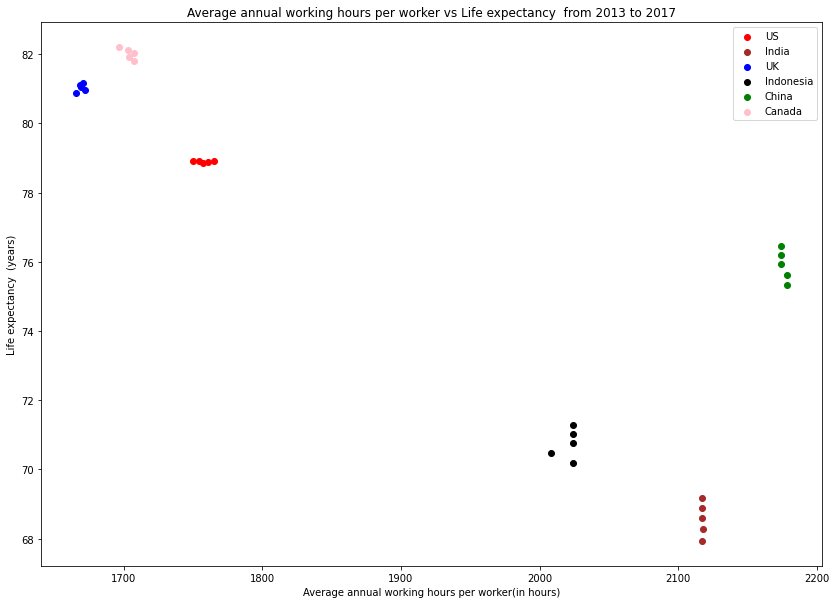

In [ ]:
fig,ax=plt.subplots(figsize=(14,10))



ax.scatter(df_hours_United_States_year['Average annual working hours per worker'],df_expectancy_United_States_year['Life expectancy'], c='red', label='US')
ax.scatter(df_hours_India_year['Average annual working hours per worker'],df_expectancy_India_year['Life expectancy'], c='brown', label='India')

ax.scatter(df_hours_United_Kingdom_year['Average annual working hours per worker'],df_expectancy_United_Kingdom_year['Life expectancy'], c='blue', label='UK')

ax.scatter(df_hours_Indonesia_year['Average annual working hours per worker'],df_expectancy_Indonesia_year['Life expectancy'], c='black', label='Indonesia')

ax.scatter(df_hours_china_year['Average annual working hours per worker'],df_expectancy_china_year['Life expectancy'], c='green', label='China')

ax.scatter(df_hours_Canada_year['Average annual working hours per worker'],df_expectancy_Canada_year['Life expectancy'], c='pink', label='Canada')


ax.legend()
plt.xlabel('Average annual working hours per worker(in hours)')
plt.ylabel('Life expectancy  (years)')
plt.title('Average annual working hours per worker vs Life expectancy  from 2013 to 2017')
plt.show()

**2.b Economic Freedon V/S Happiness**

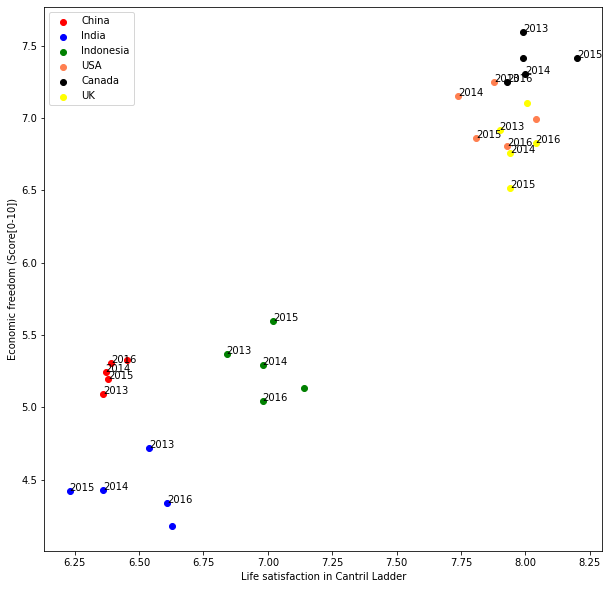

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))

#China
x=df_eco_china_year['Economic Freedom of the World'].values
y=df_happy_china_year['Life satisfaction in Cantril Ladder (World Happiness Report 2021)'].values
ax.scatter(x,y, c='red', label='China')

n=[2013,2014,2015,2016]
for i, txt in enumerate(n):
    ax.annotate(txt,(x[i], y[i]))

#India
x=df_eco_India_year['Economic Freedom of the World'].values
y=df_happy_India_year['Life satisfaction in Cantril Ladder (World Happiness Report 2021)'].values
ax.scatter(x,y, c='blue', label='India')
for i, txt in enumerate(n):
    ax.annotate(txt,(x[i], y[i]))


#Indonesia
x=df_eco_Indonesia_year['Economic Freedom of the World'].values
y=df_happy_Indonesia_year['Life satisfaction in Cantril Ladder (World Happiness Report 2021)'].values
ax.scatter(x,y, c='green', label='Indonesia')

for i, txt in enumerate(n):
    ax.annotate(txt,(x[i], y[i]))

#USA
x=df_eco_United_States_year['Economic Freedom of the World'].values
y=df_happy_United_States_year['Life satisfaction in Cantril Ladder (World Happiness Report 2021)'].values
ax.scatter(x,y, c='coral', label='USA')

for i, txt in enumerate(n):
    ax.annotate(txt,(x[i], y[i]))

#Canada
x=df_eco_Canada_year['Economic Freedom of the World'].values
y=df_happy_Canada_year['Life satisfaction in Cantril Ladder (World Happiness Report 2021)'].values
ax.scatter(x,y, c='black', label='Canada')

for i, txt in enumerate(n):
    ax.annotate(txt,(x[i], y[i]))


#UK
x=df_eco_United_Kingdom_year['Economic Freedom of the World'].values
y=df_happy_United_Kingdom_year['Life satisfaction in Cantril Ladder (World Happiness Report 2021)'].values
ax.scatter(x,y, c='yellow', label='UK')

for i, txt in enumerate(n):
    ax.annotate(txt,(x[i], y[i]))

ax.legend()
plt.xlabel('Life satisfaction in Cantril Ladder')
plt.ylabel('Economic freedom (Score[0-10])')
plt.show()


**2.c Working Hours V/S GDP per capita**

In [ ]:
"""
fig, ax1 = plt.subplots(figsize=(7,7))

# UK
ps1 = ax1.plot(df_hours_United_Kingdom_year['Year'], df_hours_United_Kingdom_year['Average annual working hours per worker'], '--', color='blue', linewidth=2, label='UK annual working hours')
# second y-axis for UK
ax2 = ax1.twinx()
ps2= ax2.plot([2013,2014,2015,2016,2017], df_GDP_United_Kingdom_year['GDP per capita'],color='red', linewidth=2, label='UK GDP per capita')


ax1.set_xlabel("Year")
ax1.set_ylabel("Average Working Hours")
ax2.set_ylabel("GDP per capita")
plt.title('Average Working Hours vs. GDP per capita"')
plt.xticks(np.arange(2012,2018,1))
# Legend
fig.legend()


fig, ax1 = plt.subplots(figsize=(7,7))

# China
ps1 = ax1.plot(df_hours_china_year['Year'], df_hours_china_year['Average annual working hours per worker'], '--', color='blue', linewidth=2, label='China annual working hours')
# second y-axis for China
ax2 = ax1.twinx()
ps2= ax2.plot([2013,2014,2015,2016,2017], df_GDP_china_year['GDP per capita'],color='red', linewidth=2, label='China GDP per capita')


ax1.set_xlabel("Year")
ax1.set_ylabel("Average Working Hours")
ax2.set_ylabel("GDP per capita")
plt.title('Average Working Hours vs. GDP per capita"')
plt.xticks(np.arange(2012,2018,1))
# Legend
fig.legend()

fig, ax1 = plt.subplots(figsize=(7,7))

# India
ps1 = ax1.plot(df_hours_India_year['Year'], df_hours_India_year['Average annual working hours per worker'], '--', color='blue', linewidth=2, label='India annual working hours')
# second y-axis for India
ax2 = ax1.twinx()
ps2= ax2.plot([2013,2014,2015,2016,2017], df_GDP_India_year['GDP per capita'],color='red', linewidth=2, label='India GDP per capita')


ax1.set_xlabel("Year")
ax1.set_ylabel("Average Working Hours")
ax2.set_ylabel("GDP per capita")
plt.title('Average Working Hours vs. GDP per capita"')
plt.xticks(np.arange(2012,2018,1))
# Legend
fig.legend()


fig, ax1 = plt.subplots(figsize=(7,7))

# Indonesia
ps1 = ax1.plot(df_hours_Indonesia_year['Year'], df_hours_Indonesia_year['Average annual working hours per worker'], '--', color='blue', linewidth=2, label='Indonesia annual working hours')
# second y-axis for Indonesia
ax2 = ax1.twinx()
ps2= ax2.plot([2013,2014,2015,2016,2017], df_GDP_Indonesia_year['GDP per capita'],color='red', linewidth=2, label='Indonesia GDP per capita')


ax1.set_xlabel("Year")
ax1.set_ylabel("Average Working Hours")
ax2.set_ylabel("GDP per capita")
plt.title('Average Working Hours vs. GDP per capita"')
plt.xticks(np.arange(2012,2018,1))
# Legend
fig.legend()


fig, ax1 = plt.subplots(figsize=(7,7))

# United States
ps1 = ax1.plot(df_hours_United_States_year['Year'], df_hours_United_States_year['Average annual working hours per worker'], '--', color='blue', linewidth=2, label='US annual working hours')
# second y-axis for United States
ax2 = ax1.twinx()
ps2= ax2.plot([2013,2014,2015,2016,2017], df_GDP_United_States_year['GDP per capita'],color='red', linewidth=2, label='US GDP per capita')


ax1.set_xlabel("Year")
ax1.set_ylabel("Average Working Hours")
ax2.set_ylabel("GDP per capita")
plt.title('Average Working Hours vs. GDP per capita"')
plt.xticks(np.arange(2012,2018,1))
# Legend
fig.legend()

fig, ax1 = plt.subplots(figsize=(7,7))

# Canada
ps1 = ax1.plot(df_hours_Canada_year['Year'], df_hours_Canada_year['Average annual working hours per worker'], '--', color='blue', linewidth=2, label='Canada annual working hours')
# second y-axis for Canada
ax2 = ax1.twinx()
ps2= ax2.plot([2013,2014,2015,2016,2017], df_GDP_Canada_year['GDP per capita'],color='red', linewidth=2, label='Canada GDP per capita')


ax1.set_xlabel("Year")
ax1.set_ylabel("Average Working Hours")
ax2.set_ylabel("GDP per capita")
plt.title('Average Working Hours vs. GDP per capita"')
plt.xticks(np.arange(2012,2018,1))
# Legend
fig.legend()

"""

'\nfig, ax1 = plt.subplots(figsize=(7,7))\n\n# UK\nps1 = ax1.plot(df_hours_United_Kingdom_year[\'Year\'], df_hours_United_Kingdom_year[\'Average annual working hours per worker\'], \'--\', color=\'blue\', linewidth=2, label=\'UK annual working hours\')\n# second y-axis for UK\nax2 = ax1.twinx()\nps2= ax2.plot([2013,2014,2015,2016,2017], df_GDP_United_Kingdom_year[\'GDP per capita\'],color=\'red\', linewidth=2, label=\'UK GDP per capita\')\n\n\nax1.set_xlabel("Year")\nax1.set_ylabel("Average Working Hours")\nax2.set_ylabel("GDP per capita")\nplt.title(\'Average Working Hours vs. GDP per capita"\')\nplt.xticks(np.arange(2012,2018,1))\n# Legend\nfig.legend()\n\n\nfig, ax1 = plt.subplots(figsize=(7,7))\n\n# China\nps1 = ax1.plot(df_hours_china_year[\'Year\'], df_hours_china_year[\'Average annual working hours per worker\'], \'--\', color=\'blue\', linewidth=2, label=\'China annual working hours\')\n# second y-axis for China\nax2 = ax1.twinx()\nps2= ax2.plot([2013,2014,2015,2016,2017], df_G

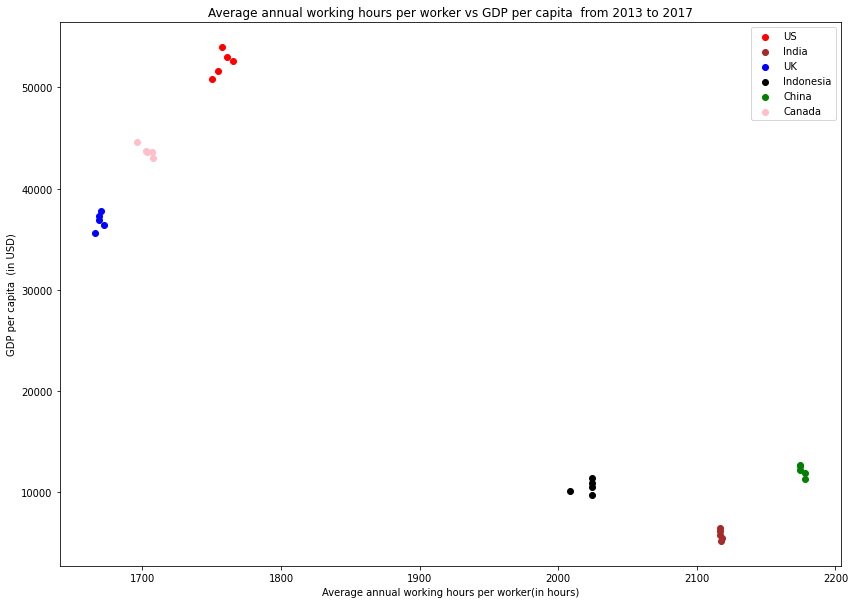

In [ ]:
#Working Hours V/S GDP per capita


fig,ax=plt.subplots(figsize=(14,10))



ax.scatter(df_hours_United_States_year['Average annual working hours per worker'],df_GDP_United_States_year['GDP per capita'], c='red', label='US')
ax.scatter(df_hours_India_year['Average annual working hours per worker'],df_GDP_India_year['GDP per capita'], c='brown', label='India')

ax.scatter(df_hours_United_Kingdom_year['Average annual working hours per worker'],df_GDP_United_Kingdom_year['GDP per capita'], c='blue', label='UK')

ax.scatter(df_hours_Indonesia_year['Average annual working hours per worker'],df_GDP_Indonesia_year['GDP per capita'], c='black', label='Indonesia')

ax.scatter(df_hours_china_year['Average annual working hours per worker'],df_GDP_china_year['GDP per capita'], c='green', label='China')

ax.scatter(df_hours_Canada_year['Average annual working hours per worker'],df_GDP_Canada_year['GDP per capita'], c='pink', label='Canada')


ax.legend()
plt.xlabel('Average annual working hours per worker(in hours)')
plt.ylabel('GDP per capita  (in USD)')
plt.title('Average annual working hours per worker vs GDP per capita  from 2013 to 2017')
plt.show()